### Remove Constants/Quasi Constants

In [10]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(features)
constant_columns = [column for column in features.columns
                    if column not in features.columns[constant_filter.get_support()]]

print(">> Constant Columns:",len(constant_columns),"\n")
print(constant_columns)

features = features.drop(columns = constant_columns)
    
qconstant_filter = VarianceThreshold(threshold=0.05)
qconstant_filter.fit(features)
qconstant_columns = [column for column in features.columns
                    if column not in features.columns[qconstant_filter.get_support()]]

print("\n >> Quasi Constant Columns:",len(qconstant_columns),"\n")
print(qconstant_columns)

features_const = features.drop(columns = qconstant_columns)

print("\n\n New dimensions of X:",features_const.shape)

features_const.head()

>> Constant Columns: 0 

[]

 >> Quasi Constant Columns: 24 

['CAA', 'ODA', 'SBA', 'TDA', 'LAA', 'CurrDatediffbranch_Txn', 'past1modiffbranch_Txn', 'past2modiffbranch_Txn', 'CurrDatebranch_Txn_Change1mo', 'CurrDatebranch_Txn_Change2mo', 'CurrDatebranch_Visit_Change1mo', 'CurrDatebranch_Visit_Change2mo', 'CurrDatesamebranch_Txn_Change1mo', 'CurrDatesamebranch_Txn_Change2mo', 'CurrDatesamebranch_Visit_Change1mo', 'CurrDatesamebranch_Visit_Change2mo', 'CurrDatediffbranch_Txn_Change1mo', 'CurrDatediffbranch_Txn_Change2mo', 'CurrDatediffbranch_Amt_Change1mo', 'CurrDatediffbranch_Amt_Change2mo', 'CurrDatediffbranch_Visit_Change1mo', 'CurrDatediffbranch_Visit_Change2mo', 'CurrDatediffbranch_Txn_Ave_Change1mo', 'CurrDatediffbranch_Txn_Ave_Change2mo']


 New dimensions of X: (1787447, 131)


,CurrDateADB,CurrDateOB,past1moADB,past1moOB,past2moADB,past2moOB,tenure_mos,NoOfClosedAccts,NoOfOpenAccts,CurrDatebranch_Txn,...,CurrDatebranch_Txn_Ave_Change2mo,CurrDatesamebranch_Txn_Ave_Change1mo,CurrDatesamebranch_Txn_Ave_Change2mo,TotalTxnCurrDate_Ave_Change1mo,TotalTxnCurrDate_Ave_Change2mo,CredTxnCurrDate_Ave_Change1mo,CredTxnCurrDate_Ave_Change2mo,DebTxnCurrDate_Ave_Change1mo,DebTxnCurrDate_Ave_Change2mo,ConvBankUser
mastercif,,,,,,,,,,,,,,,,,,,,,
4373524,15841.32,73115.90,12804.93,53084.92,49866.13,320.40,24.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,1.085922,0.132250,0.115528,0.329469,0.069138,-0.631902,1.0
1454133,21674.65,66485.96,10941.69,17537.10,13364.49,276.04,200.0,3.0,5.0,3.0,...,-0.056180,-0.558360,-0.056180,1.346370,2.475744,0.013105,0.743684,2.889815,4.202267,1.0
169504,1168051.03,607127.52,1529096.59,1236847.39,213220.83,1801205.34,204.0,4.0,2.0,1.0,...,-0.750000,1.495840,-0.750000,-0.658064,-0.888135,-0.827633,-0.978251,-0.560861,-0.721001,1.0
1824003,8141.28,15197.32,9297.45,18799.92,16070.54,5343.34,141.0,2.0,1.0,5.0,...,0.716889,1.276423,0.716889,-0.991534,-0.995150,-0.996691,-0.997147,-0.986129,-0.993329,1.0
1951080,946439.26,1571118.75,393570.50,213016.28,286558.23,464215.79,142.0,3.0,4.0,9.0,...,-0.782959,-0.384839,-0.782959,0.065809,-0.336198,-0.555434,-0.874082,0.540288,0.545430,1.0


### Remove Outliers

In [11]:
#from sklearn.ensemble import IsolationForest

#print("Before outlier treatment:\n", features_const.shape)

#Iso_outliers = IsolationForest().fit(features_const)
#features_const['outlier'] = Iso_outliers.predict(features_const)
#features_const = features_const.loc[features_const.outlier==1,]

#del(features_const['outlier'])

#print("After outlier treatment:\n", features_const.shape)

#features_const.head()

In [12]:
#Outlier treatment
print("Before outlier treatment:\n", features_const.shape)

train = features_const
for column in train:
    vals = train[column]
    VAR_1ST = np.percentile(vals, 6) # return 1st percentile, e.g median.
    VAR_95TH = np.percentile(vals, 95) # return 99th percentile, e.g median.
    print(column,"VAR_1ST = ",VAR_1ST, "VAR_95TH = ", VAR_95TH)
    train[column] = np.where(train[column] < VAR_1ST, VAR_1ST, train[column])
    train[column] = np.where(train[column] > VAR_95TH, VAR_95TH, train[column])
    
features_const = train

print("Before outlier treatment:\n", features_const.shape)

Before outlier treatment:
 (1787447, 131)
CurrDateADB VAR_1ST =  34.9 VAR_95TH =  37080.87199999996
CurrDateOB VAR_1ST =  8.84 VAR_95TH =  39657.376999999964
past1moADB VAR_1ST =  18.43 VAR_95TH =  36452.524
past1moOB VAR_1ST =  5.97 VAR_95TH =  39042.66199999998
past2moADB VAR_1ST =  11.8 VAR_95TH =  31197.746999999992
past2moOB VAR_1ST =  2.22 VAR_95TH =  40157.96799999996
tenure_mos VAR_1ST =  5.0 VAR_95TH =  182.0
NoOfClosedAccts VAR_1ST =  0.0 VAR_95TH =  0.0
NoOfOpenAccts VAR_1ST =  1.0 VAR_95TH =  2.0
CurrDatebranch_Txn VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatebranch_Amt VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatebranch_Visit VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatesamebranch_Txn VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatesamebranch_Amt VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatesamebranch_Visit VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatediffbranch_Amt VAR_1ST =  0.0 VAR_95TH =  0.0
CurrDatediffbranch_Visit VAR_1ST =  0.0 VAR_95TH =  0.0
past1mobranch_Txn VAR_1ST =  0.0 VAR_95TH =  0.0
past1mobran

In [13]:
features_const = features_const.loc[:, (features_const != 0).any(axis=0)] #deleting columns that are all zeroes

In [14]:
features_const.shape

(1787447, 75)

In [15]:
features_const.head()

,CurrDateADB,CurrDateOB,past1moADB,past1moOB,past2moADB,past2moOB,tenure_mos,NoOfOpenAccts,TotalTxnCurrDate,TotalAmtCurrDate,...,CredAmtCurrDate_Change2mo,DebMaxTransCurrDate_Change1mo,DebMaxTransCurrDate_Change2mo,DebMaxAmountCurrDate_Change1mo,DebMaxAmountCurrDate_Change2mo,DebTxnCurrDate_Change1mo,DebTxnCurrDate_Change2mo,DebAmtCurrDate_Change1mo,DebAmtCurrDate_Change2mo,ConvBankUser
mastercif,,,,,,,,,,,,,,,,,,,,,
4373524,15841.320,39657.377,12804.930,39042.662,31197.747,320.400,24.0,1.0,1.0,2600.0,...,-0.335266,-0.500000,-0.500000,-0.442236,-0.335266,-0.866667,-0.833333,-0.857448,-0.938650,1.0
1454133,21674.650,39657.377,10941.690,17537.100,13364.490,276.040,182.0,2.0,1.0,2600.0,...,-0.932935,-0.923077,-0.800000,-0.827586,-0.862069,-0.977528,-0.970149,-0.912588,-0.844708,1.0
169504,37080.872,39657.377,36452.524,39042.662,31197.747,40157.968,182.0,2.0,1.0,2600.0,...,-0.998188,-0.928571,-0.888889,-0.984340,-0.998100,-0.975000,-0.975904,-0.989022,-0.993277,1.0
1824003,8141.280,15197.320,9297.450,18799.920,16070.540,5343.340,141.0,1.0,1.0,300.0,...,-0.999822,-0.800000,-0.875000,-0.999187,-0.999647,-0.944444,-0.951220,-0.999229,-0.999675,1.0
1951080,37080.872,39657.377,36452.524,39042.662,31197.747,40157.968,142.0,2.0,1.0,2600.0,...,-0.979014,-0.833333,-0.666667,-0.940012,-0.977802,-0.914286,-0.869565,-0.867975,-0.798422,1.0


### Scale the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
#Getting binary variables
bool_cols = [col for col in features_const
             if np.isin(features[col].dropna().unique(), [0, 1]).all()]

binary = bool_cols
numeric = list(features_const.drop(binary, axis=1))

features_ = list(features_const)
num = features_const.loc[:, numeric]
scaler = MinMaxScaler()
scaler.fit(num)

def scale(data):
    num = data.loc[:, numeric]
    num = pd.DataFrame(scaler.transform(num), columns=num.columns).set_index(num.index)
    cat = data[binary]
    scaled = pd.concat([num, cat], axis=1).loc[:, features_]
    return scaled

features = scale(features_const)

### PCA (Checking for the number of Principal Components .8 threshold)

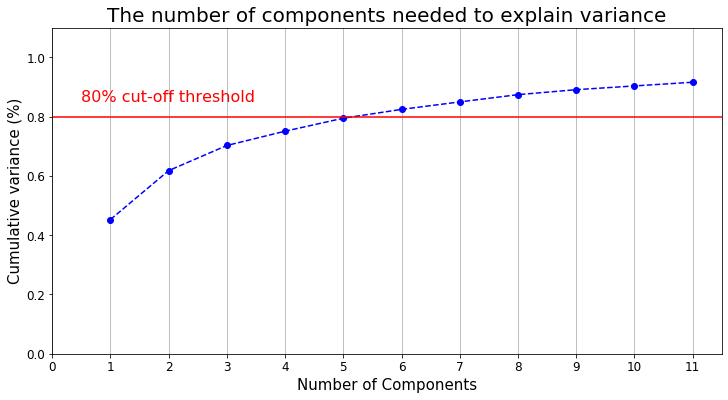

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(features)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
y = y[:11]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', fontsize = 15)
plt.xticks(np.arange(0, 12, step=1),fontsize=12) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)', fontsize = 15)
plt.yticks(fontsize=12)
plt.title('The number of components needed to explain variance', fontsize = 20)


plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# 5 components to explain 80% of the variance

In [18]:
#Doing this just to plot (Note: This only shows around 50% of the variance of the data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index=features.index)

In [19]:
principalDf

,principal component 1,principal component 2
mastercif,,
4373524,2.558687,0.316698
1454133,3.238691,-0.323711
169504,4.151397,-0.729909
1824003,3.698597,-0.733359
1951080,3.872447,-0.471909
...,...,...
812625,-2.250568,-0.739268
3610811,-2.221582,-0.693177
5550333,-2.254818,-0.731243


In [20]:
finalDf = pd.concat([principalDf, response_varb], axis = 1)

In [21]:
finalDf.head()

,principal component 1,principal component 2,response
mastercif,,,
4373524,2.558687,0.316698,0.0
1454133,3.238691,-0.323711,0.0
169504,4.151397,-0.729909,0.0
1824003,3.698597,-0.733359,0.0
1951080,3.872447,-0.471909,0.0


### Plotting Figure (0 - non online seller, 1 - online seller)

#### *Note that this is 2-Dimensional

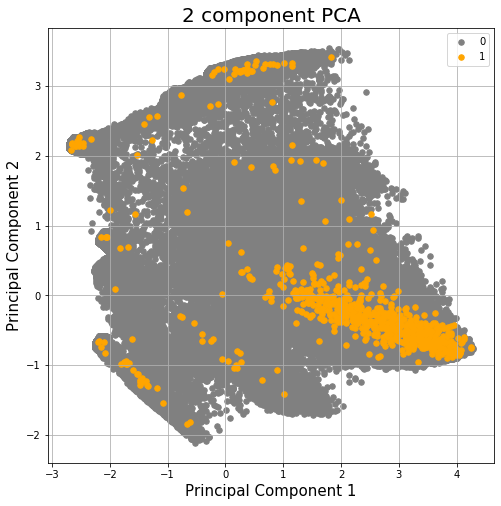

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['gray', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['response'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()

In [23]:
df_onlineseller = features.join(response_varb)

In [24]:
df_onlineseller = df_onlineseller[df_onlineseller['response'] == 1]
print(df_onlineseller.response.value_counts())
df_onlineseller = df_onlineseller.drop('response', axis=1)

1.0    864
Name: response, dtype: int64


In [25]:
df_onlineseller.head()

,CurrDateADB,CurrDateOB,past1moADB,past1moOB,past2moADB,past2moOB,tenure_mos,NoOfOpenAccts,TotalTxnCurrDate,TotalAmtCurrDate,...,CredAmtCurrDate_Change2mo,DebMaxTransCurrDate_Change1mo,DebMaxTransCurrDate_Change2mo,DebMaxAmountCurrDate_Change1mo,DebMaxAmountCurrDate_Change2mo,DebTxnCurrDate_Change1mo,DebTxnCurrDate_Change2mo,DebAmtCurrDate_Change1mo,DebAmtCurrDate_Change2mo,ConvBankUser
mastercif,,,,,,,,,,,,,,,,,,,,,
4379505,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.011299,1.0,1.0,1.000000,...,0.271654,1.000000,1.000000,0.198768,0.273523,0.188679,0.149254,0.203076,0.102202,1.0
2401433,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.926554,1.0,1.0,1.000000,...,0.008939,0.333333,0.500000,0.021642,0.012499,0.102041,0.092593,0.011289,0.042499,1.0
1949552,0.330115,0.048659,0.200649,0.124999,0.659178,0.023572,0.598870,1.0,1.0,0.515385,...,0.001983,0.064516,0.100000,0.002413,0.003154,0.038462,0.046875,0.003209,0.004486,1.0
3944139,0.707816,0.136099,0.794702,1.000000,0.064863,0.056877,0.593220,1.0,1.0,1.000000,...,0.369527,0.750000,1.000000,0.123504,1.000000,0.200000,0.156250,0.439865,0.469811,1.0
3027464,1.000000,1.000000,1.000000,1.000000,0.653042,1.000000,0.322034,0.0,1.0,1.000000,...,0.013441,0.052632,0.047619,0.021754,0.018421,0.146341,0.127660,0.448351,0.378171,1.0


In [26]:
#Get PCA5

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_onlineseller)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2', "PCA3", "PCA4", "PCA5"], index=df_onlineseller.index)

In [27]:
principalDf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
mastercif,,,,,
4379505,-2.114236,3.241829,-0.845637,-0.047373,0.369006
2401433,-2.797733,2.373228,-0.223833,0.152646,0.827384
1949552,-2.018625,0.826027,0.694675,-0.196922,-0.784337
3944139,-0.453007,2.850820,0.739958,0.872226,-0.506194
3027464,-2.430086,2.180503,0.289636,0.071763,0.868160


### Cluster Online Sellers

In [28]:
from sklearn.cluster import KMeans

sse = []
#instantiate kmeans
for i in range(1,11):
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(principalDf)
    sse.append(km.inertia_)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

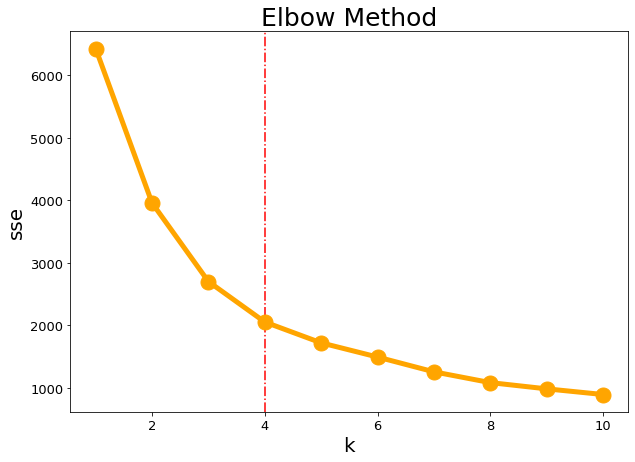

In [29]:
#Plot the results
plt.figure(figsize=(10,7))
plt.axvline(x=4, color='red', linestyle='-.')
plt.plot(range(1,11), sse, marker='o',markersize=15,linewidth=5,markerfacecolor='orange',color='orange')
plt.title('Elbow Method', fontsize = 25)
plt.xlabel("k", fontsize=20)
plt.ylabel("sse", fontsize=20)
plt.xticks(fontsize=13)
plt.yticks( fontsize=13)

In [30]:
#Fit kmeans to the dataset with k=4
km=KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
#list cluster, names y_means
y_means = km.fit_predict(principalDf)

In [31]:
#Create new df, name df_res
df_ol_cluster = df_onlineseller.copy()

#Add Clusters column to df_res 
df_ol_cluster['Cluster'] = y_means
